In [1]:
import pandas as pd #사용 시작 전 food_data_preprocessing_final.csv 와 nutri_clean.xlsx 저장
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [2]:
food_data=pd.read_csv("food_data_preprocessing_final.csv")
food_data=food_data.drop(columns=['Unnamed: 0'])
food_data #정제된 식품 데이터 데이터프레임으로 호출

,식품명,energy,protein,calcium,phosphorus,iron,niacin,folate,vitaC,thiamin,riboflavin
0,꿩불고기,368.80,33.50,105.61,458.05,0.00400,3.61,63.13,2.99,0.00,0.33
1,닭갈비,595.61,45.90,98.64,505.25,0.00338,1.23,108.13,5.54,0.24,0.37
2,닭꼬치,176.72,11.56,17.68,122.80,0.00764,1.71,0.00,0.00,0.23,0.18
3,더덕구이,184.00,3.10,46.42,88.17,0.00143,0.18,16.77,1.34,0.23,0.08
4,도미구이,397.00,61.10,158.80,690.91,0.00097,6.35,37.98,0.84,0.10,0.27
...,...,...,...,...,...,...,...,...,...,...,...
24181,녹차치아바타샌드위치(치킨브레스트&머쉬룸),420.00,25.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
24182,러브잇 닭가슴살 카레 매운맛,120.00,10.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
24183,얼큰추어탕,210.00,11.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
24184,닭고기영양진국,41.00,5.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00


In [3]:
def day_7_nutrient(food_data):
    food=[x for x in input("공백을 구분자로 먹은 식단을 입력바랍니다: ").split()] #일상섭취량을 구하기 위해 식단 입력 (일상섭취량 : 하루동안 섭취하는 평균적인 섭취량)
    food_result=pd.DataFrame() #day_7_nutrient 함수를 통한 출력값으로 데이터프레임 생성
    for i in range(len(food_data)): 
        for j in range(len(food)):
            if food_data['식품명'][i]==food[j]:    
                food_result_=food_data.loc[i]
                food_result=pd.concat([food_result,food_result_],axis=1) #음식 데이터에 일치하는 이름의 행을 모아 새로운 데이터 프레임 생성

    food_result=food_result.T
    day7_mean=pd.DataFrame(food_result.iloc[:,1:].sum()/7)
    day7_mean.columns=['7일영양소평균'] #입력받은 식단 데이터를 종합한 후 7로 나눈 하루 평균 섭취량(일상섭취량) 추출
    return day7_mean #일상섭취량 반환

In [6]:
def recommend_intake(age,sex,height,weight,PA): #개인별 권장섭취량 계산(나이, 성별, 키, 몸무게, 활동수준 고려)
    if sex=='남': #남자일 경우
        energy=662-9.53*age+PA*(15.91*weight+539.6*height/100) #남성 에너지 계산식
        iron=(0.014*weight)/0.12*1.3 #남성 철 계산식
        if 19<=age<=64: 
            thiamin=1*1.2 #19세 이상 64세 이하 남성 티아민 계산식
            riboflavin=1.3*1.2 #19세 이상 64세 이하 남성 리보플라빈 계산식
            niacin=12*1.3 #19세 이상 64세 이하 남성 니아신 계산식
        elif age>=65: 
            thiamin=1*weight/68.9*1.2 #65세 이상 남성 티아민 계산식 
            riboflavin=1.3*(weight/68.9) #65세 이상 남성 리보플라빈 계산식
            niacin=11*1.3 #65세 이상 남성 니아신 계산식
            if age>=75: 
                niacin=10*1.3 #75세 이상 남성 니아신 계산식
    elif sex=='여': #여자일 경우
        energy=354-6.91*age+PA*(9.36*weight+726*height/100) #여성 에너지 계산식
        iron=(0.014*weight+0.05)/0.12*1.3 #여성 철 계산식
        if 19<=age<=64: 
            thiamin=0.9*1.2 #19세 이상 64세 이하 여성 티아민 계산식
            riboflavin=1*1.2 #19세 이상 64세 이하 여성 리보플라빈 계산식
            niacin=11*1.3 #19세 이상 64세 이하 여성 니아신 계산식
        elif age>=65:
            thiamin=0.9*(weight/55.9)*1.2 #65세 이상 여성 티아민 계산식
            riboflavin=1*(weight/55.9)*1.2 #65세 이상 여성 리보플라빈 계산식
            niacin=10*1.3 ##65세 이상 여성 니아신 계산식
            if age>=75:
                niacin=9*1.3 #75세 이상 여성 니아신 계산식
    protein=0.66/0.9*weight*1.25 #프로틴 계산식 (남녀 동일)
    calcium=9.39*weight*1.2 #칼슘 계산식 (남녀 동일)
    phosphorus=580*1.2 #인 계산식 (남녀 동일)
    vitaC=75*1.3 #비타민C 계산식 (남녀 동일)
    folate=320*1.2 #엽산 계산식 (남녀 동일)
    recommend=pd.DataFrame({'권장섭취량':[energy,protein,calcium,phosphorus,iron,niacin,folate,vitaC,thiamin,riboflavin]},index=['energy','protein','calcium','phosphorus','iron','niacin','folate','vitaC','thiamin','riboflavin']) #계산된 개인별 권장섭취량 값들로 데이터프레임 생성  
    return recommend #권장섭취량 반환

In [7]:
def dist(x,y):   #유클리디안 거리를 계산하는 함수 식 
    return np.sqrt(np.sum((x-y)**2)) #유클리디안 거리 반환

In [8]:
def yournutrientinfo(age,sex,height,weight,PA): 
    info=pd.concat([recommend_intake(age,sex,height,weight,PA),day_7_nutrient(food_data)],axis=1) #concat 명령어로 위에서 추출한 사용자의 권장섭취량과 일상섭취량 한 데이터프레임으로 합치기 
    info['필요섭취량']=info['권장섭취량']-info['7일영양소평균'] #데이터프레임 연산으로 필요섭취량 계산 
    info.loc[info['필요섭취량']<0,'필요섭취량']=0 #음수인 필요섭취량은 고려하지 않기 위해 0으로 치환(음수인 필요섭취량은 과잉된 영양소로 더이상 보충이 필요하지 않아 0으로 치환하여 고려하지 않음)
    need=pd.DataFrame(info['필요섭취량']) #필요섭취량만으로 구성된 need 데이터프레임 생성
    need=need.T
    
    user_nutri=need.iloc[0].values #user_nutri라는 사용자의 필요섭취량 값만 추출
    file = 'nutri_clean.xlsx'
    df = pd.read_excel(file)
    df = pd.read_excel(file, sheet_name = 0, index_col = 1)
    df = pd.read_excel(file, sheet_name = 0, header = 0) #영양제 데이터 불러오기

    for i in range(len(df)):
        df.iloc[i,1:].values #영양제 데이터 모든 인덱스의 값들 하나씩 호출

    x = df.iloc[i,1:].values #유클리디안 거리를 이용한 유사도 분석에 활용될 영양제 데이터 인덱스의 값들 하나씩 호출하여 x로 지정
    y = np.array(user_nutri) #유클리디안 거리를 이용한 유사도 분석에 활용할 사용자의 필요섭취량 y로 지정

    df_recommend=pd.DataFrame()
    df_recommend['영양제명']=df['영양제명'] #영양제명으로 이루어진 데이터프레임 생성
    user_recommend=[] #사용자 필요섭취량과 모든 영양제의 유클리디안 거리를 계산한 값으로 리스트 생성
    for i in range(len(df)):
        x = df.iloc[i,1:].values
        user_recommend.append(dist(x,y)) #반복문과 append 명령어를 통해 모든 영양제의 유클리디안 거리를 리스트에 추가
    df_recommend2=pd.DataFrame(user_recommend) #user_recommend의 리스트 형태를 df_recommend2라는 데이터프레임으로 변환
    df_recommend2.columns=['dist'] 
    df_recommend3=pd.concat([df_recommend,df_recommend2],axis=1) #영양제명과 영양제마다의 유클리디안 거리로 이루어진 데이터프레임 생성

    nutri=df_recommend3.sort_values(by='dist' ,ascending=True) #유클리디안 거리가 짧은 순서대로 데이터프레임 재생성
    print(nutri.iloc[0,0]) #거리가 가장 짧은(유사도가 제일 큰) 영양제명 출력
    
    select_nutri = df.iloc[[nutri.index.values[0]],1:] #추천하는 영양제의 영양성분 가져오기
    select_nutri = select_nutri.transpose()
    select_nutri.columns=['영양제 영양성분']
    visual_data=pd.concat([info,select_nutri],axis=1) #위에서 생성한 info 데이터프레임에 영양제 영양성분 칼럼 추가
    visual_data['영양제 섭취시 영양상태']=visual_data['영양제 영양성분']+visual_data['7일영양소평균'] #데이터 프레임 연산으로 데이터프레임에 영양제 섭취시 영양상태 컬럼 추가
    
    scaler = MinMaxScaler()
    visual_data[:] = scaler.fit_transform(visual_data[:]) #범위 차이를 왜곡하지 않고 공통 척도로 변경하기 위해 사용자의 권장섭취량, 일상섭취량, 추천한 영양제 섭취시 영양변화의 값들 정규화
    
    df_visual = pd.DataFrame({
        'Character': ['recommend','day_nutrient','take_nutrient'],
        'protein' : [visual_data.values[1,0], visual_data.values[1,1],visual_data.values[1,4]],
        'calcium': [visual_data.values[2,0], visual_data.values[2,1],visual_data.values[2,4]],
        'phosphorus': [visual_data.values[3,0], visual_data.values[3,1],visual_data.values[3,4]],
        'iron': [visual_data.values[4,0], visual_data.values[4,1],visual_data.values[4,4]],
        'niacin': [visual_data.values[5,0], visual_data.values[5,1],visual_data.values[5,4]],
        'folate': [visual_data.values[6,0], visual_data.values[6,1],visual_data.values[6,4]],
        'vitaC' : [visual_data.values[7,0], visual_data.values[7,1],visual_data.values[7,4]],
        'thiamin' : [visual_data.values[8,0], visual_data.values[8,1],visual_data.values[8,4]],
        'riboflavin' : [visual_data.values[9,0], visual_data.values[9,1],visual_data.values[9,4]] #정규화가 완료된 데이터에서 권장섭취량, 일상섭취량, 추천한 영양제 섭취시 영양변화 컬럼의 각 영양소의 값들 인덱싱하여 데이터프레임 생성 
    })
    
    labels = df_visual.columns[1:]
    num_labels = len(labels) #각도의 축 눈금의 라벨이 되는 영양소명들 num_labels에 입력
    
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각도의 값이 되는 리스트 입력
    angles += angles[:1] ## 그래프가 시작점으로 다시 돌아올 수 있도록 시작점(각도) 추가
    
    my_palette = plt.cm.get_cmap("Set2", len(df_visual.index))
    
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot(polar=True)
    for i, row in df_visual.iterrows():
        color = my_palette(i)
        data = df_visual.iloc[i].drop('Character').tolist()
        data += data[:1] #데이터는 각도 값이 되는 리스트와 길이가 같아야하므로 시작 데이터 값 추가
        
        ax.set_theta_offset(pi / 2) ## 그래프를 그리는 시작점 지정
        ax.set_theta_direction(-1) ## 그래프가 그려지는 방향을 시계방향으로 지정
        
        plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
        ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백 지정
        
        ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정
        plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7'], fontsize=10) ## 반지름 축 눈금 설정
        plt.ylim(0,0.7)
        
        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
        ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색 채우기
    
    plt.legend(loc=(1, 0.9))
    return plt.show() #그래프 반환

공백을 구분자로 먹은 식단을 입력바랍니다: 소고기김밥 충무김밥 주꾸미볶음 곰보빵 만주 버터크림빵 올갱이국수 소고기샤브샤브 황태해장국 치즈케이크 게살죽 버섯찌개 매운갈비찜 안심돈가스 곰치국 뼈다귀해장국 올갱이국 식혜 두부김치 해물볶음밥 장어덮밥
Nature's Way, Alive! 남성용 고기능성 종합비타민, 정제 60정


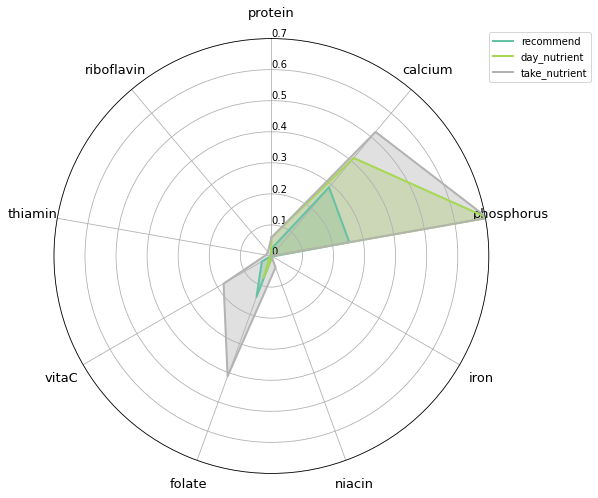

In [16]:
yournutrientinfo(25,"남",175,70,1.12)

In [ ]:
# 7일간 식단 예시 :
# 소고기김밥 충무김밥 주꾸미볶음 곰보빵 만주 버터크림빵 올갱이국수 소고기샤브샤브 황태해장국 치즈케이크 게살죽 버섯찌개 매운갈비찜 안심돈가스 곰치국 뼈다귀해장국 올갱이국 식혜 두부김치 해물볶음밥 장어덮밥